In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_plotly, plot_components_plotly
from statsmodels.tsa.api import VAR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To perform Augmented Dickey-Fuller test
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print ('Results of Augmented Dickey-Fuller Test:')   
    return (dfoutput)

#### Dataset 1:
simulated ARMA processes

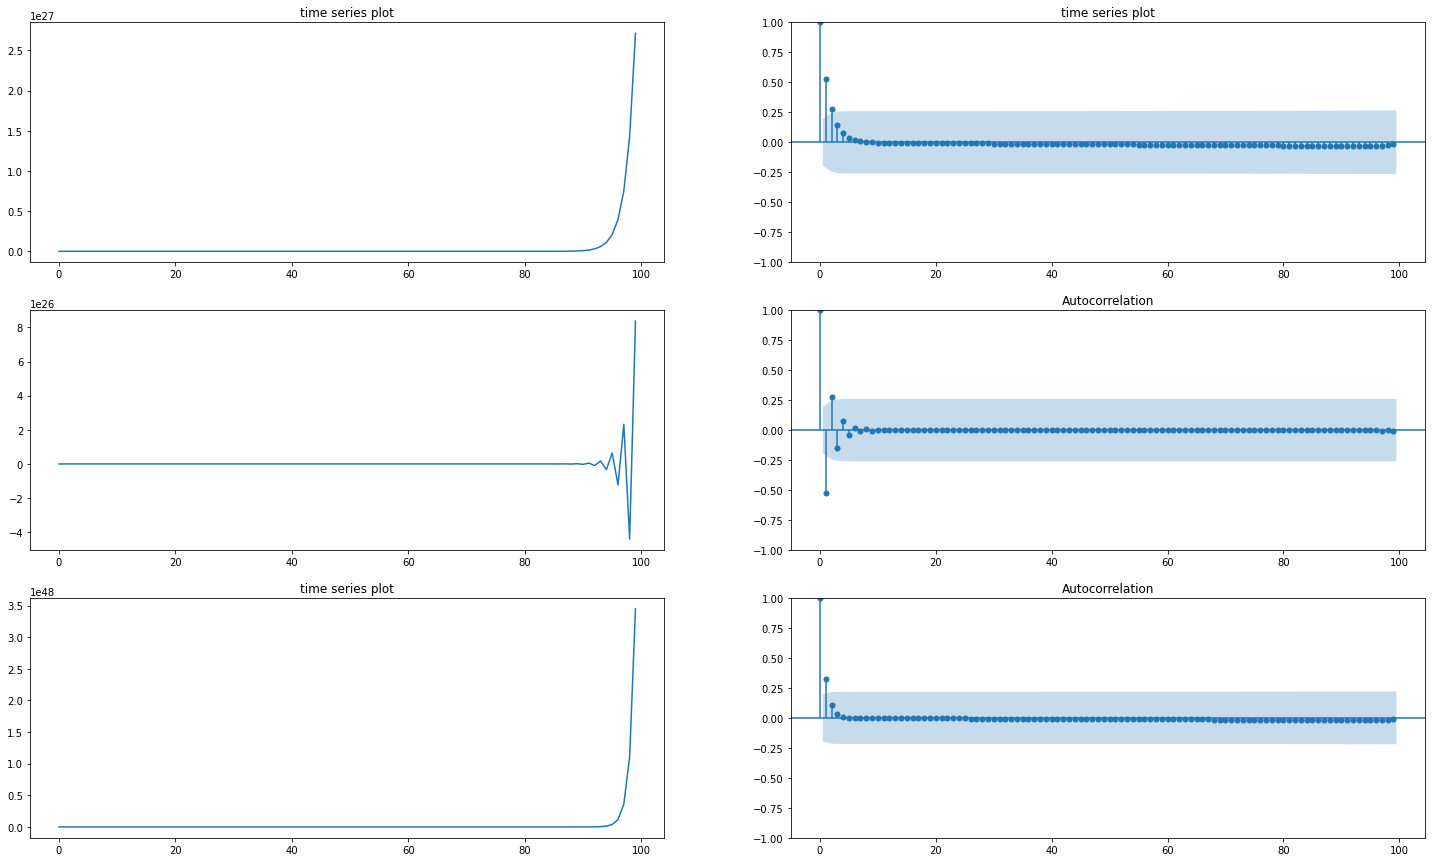

In [3]:
# # Plot 1: AR(1): Yt=1.9Yt-1+Zt, AR parameter = [1, -1.9], MA parameter=[1]

ar1 = np.array([1, -1.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=100)


# # Plot 2: AR(1): Yt=-1.9Yt-1+Zt, AR parameter = [1, 1.9], MA parameter=[1]

ar2 = np.array([1, 1.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=100)

# # Plot 3: AR(1): Yt=3.1Yt-1+Zt, AR parameter = [1, -3.1], MA parameter=[1]

ar3 = np.array([1, -3.1])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=100)



fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(25,15))
ax1.plot(simulated_data_1)
ax1.set_title("time series plot")
plot_acf(simulated_data_1 ,lags=99, ax= ax2) 

ax3.plot(simulated_data_2 )
ax2.set_title("time series plot")
plot_acf(simulated_data_2 ,lags=99, ax= ax4) 

ax5.plot(simulated_data_3 )
ax5.set_title("time series plot")
plot_acf(simulated_data_3 ,lags=99, ax= ax6) 

plt.show()

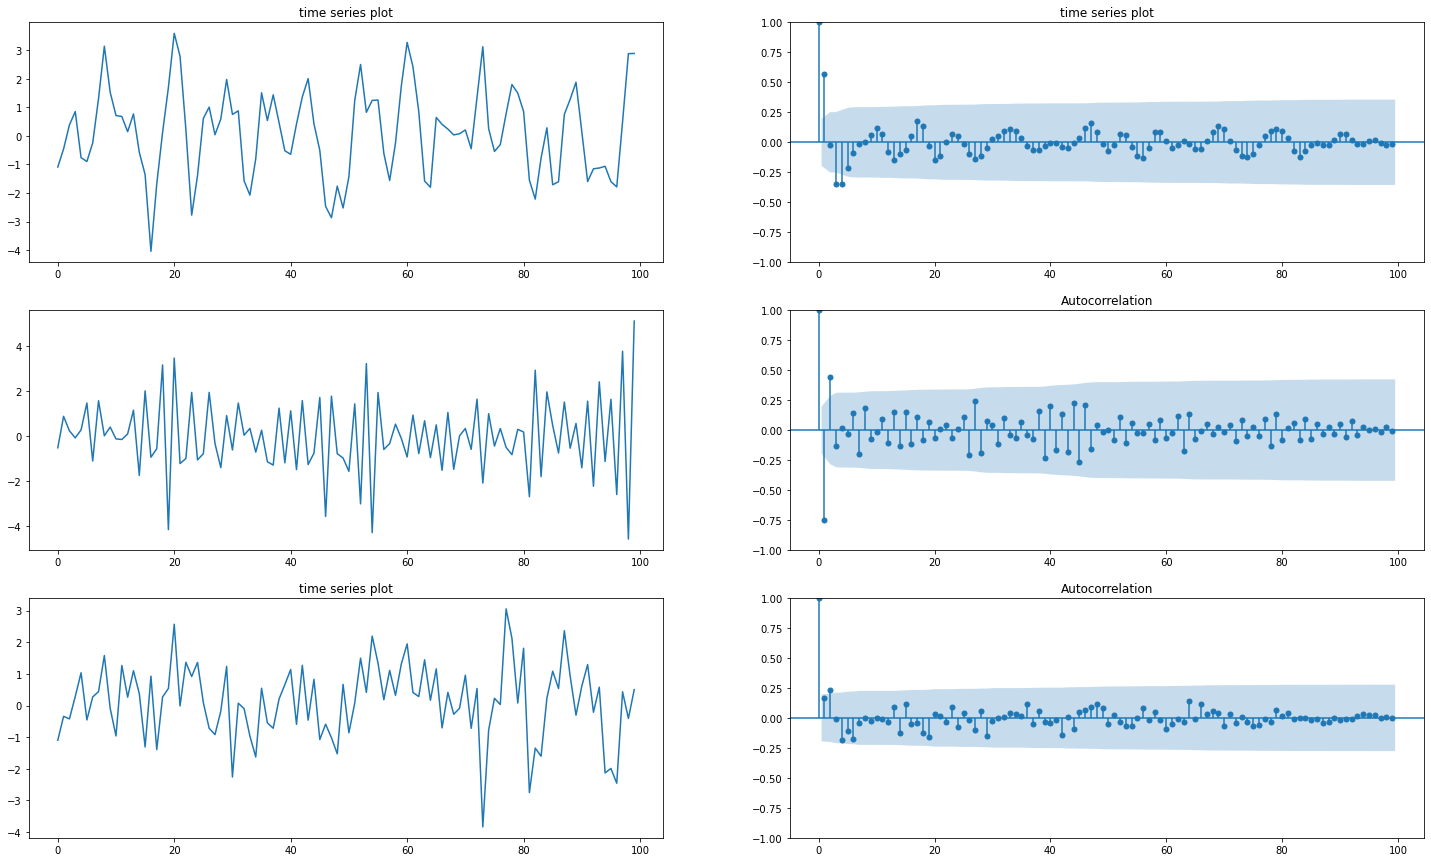

In [4]:
# AR(2)

ar1 = np.array([1, -0.9, 0.5])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=100)



ar2 = np.array([1, 0.9, 0.3])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=100)

ar3 = np.array([1, -0.1, -0.2])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=100)


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(25,15))
ax1.plot(simulated_data_1)
ax1.set_title("time series plot")
plot_acf(simulated_data_1 ,lags=99, ax= ax2)

ax3.plot(simulated_data_2 )
ax2.set_title("time series plot")
plot_acf(simulated_data_2 ,lags=99, ax= ax4)

ax5.plot(simulated_data_3 )
ax5.set_title("time series plot")
plot_acf(simulated_data_3 ,lags=99, ax= ax6)

plt.show()

####  Deciphering ARMA process orders

1000


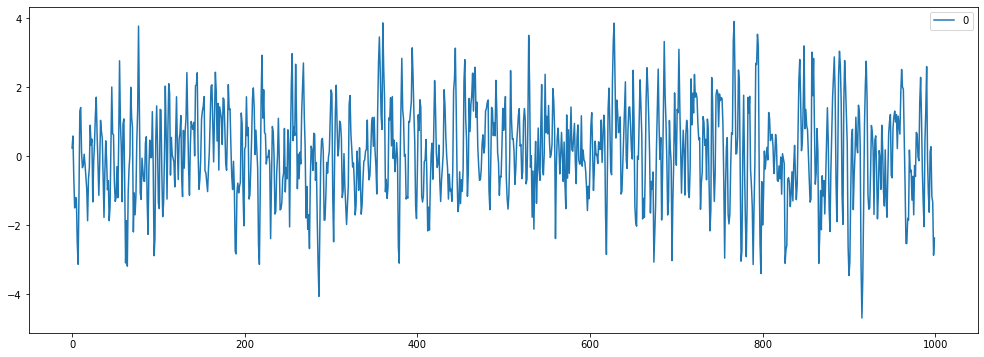

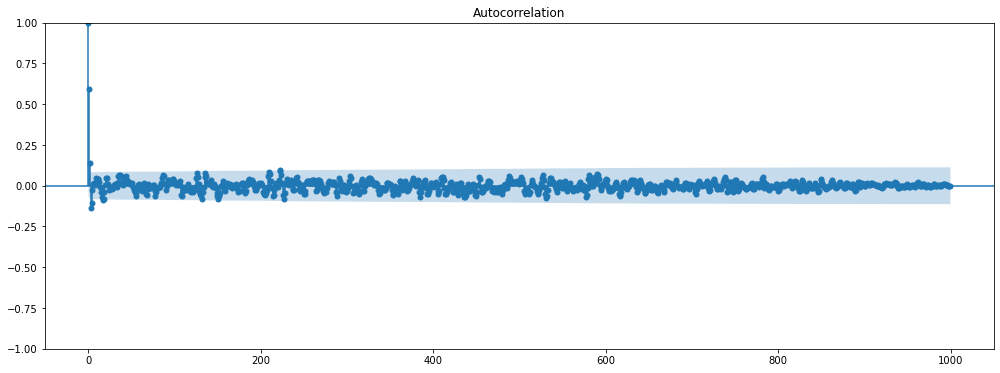

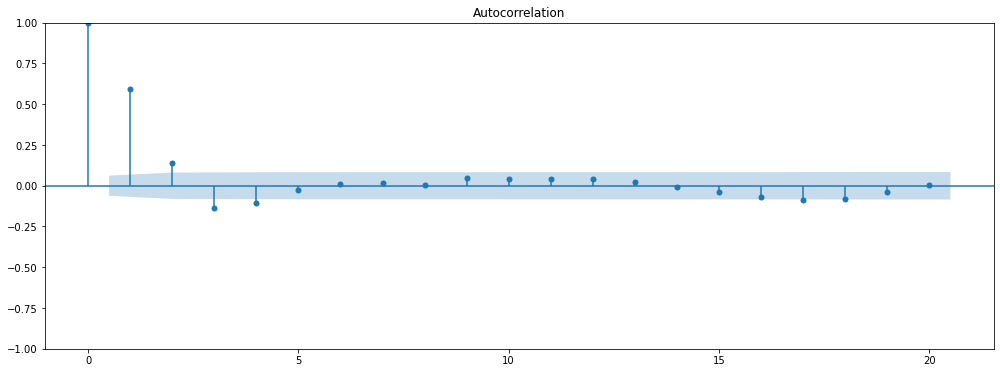

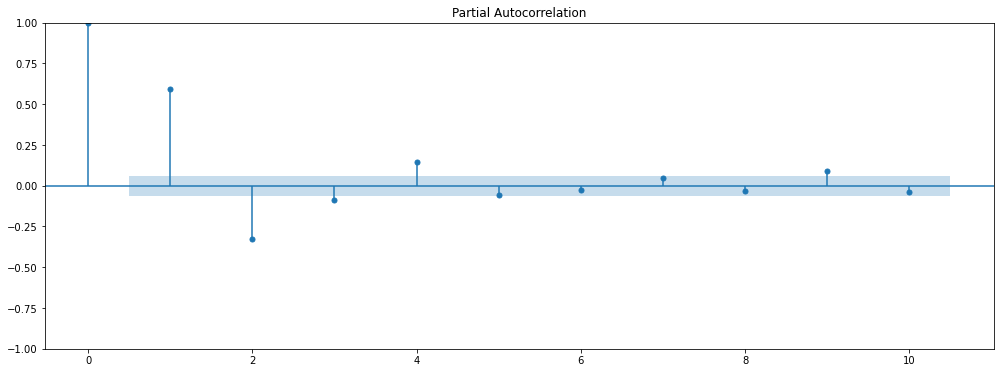

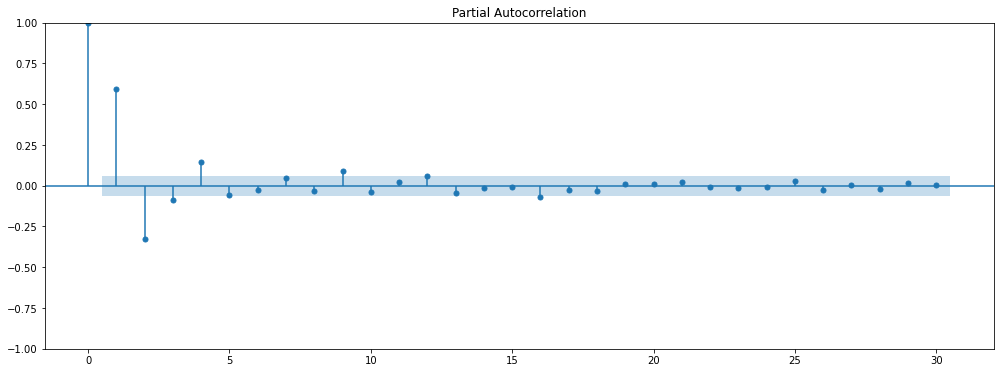

In [5]:
series = pd.read_csv('ts_2.csv')
#, header=0, index_col=0, parse_dates=True,squeeze=True)
print(len(series))
series.head()

fig, ax = plt.subplots(figsize=(17, 6))
series.plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=len(series)-1, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=20, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=10, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=30, ax= ax)
plt.show()

- Stationary
- shut off in ACF > MA (1) is a fair estimate
- Almost shut off in PACF > AR (2) is a fair estimate
- So AR(2) or MA(1) could be good estimate

1000


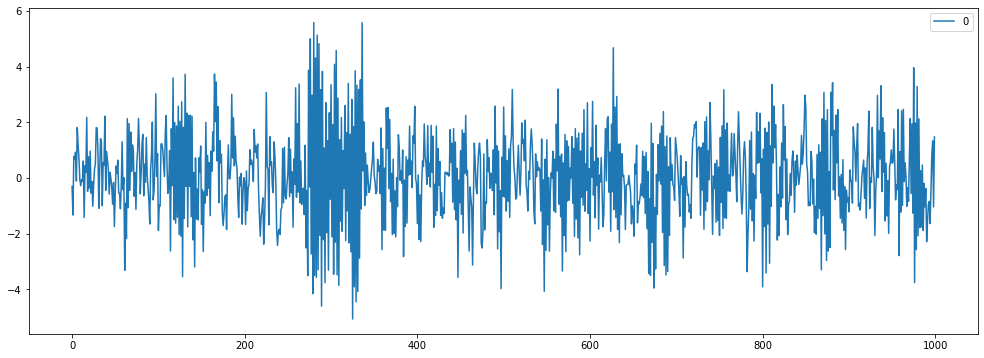

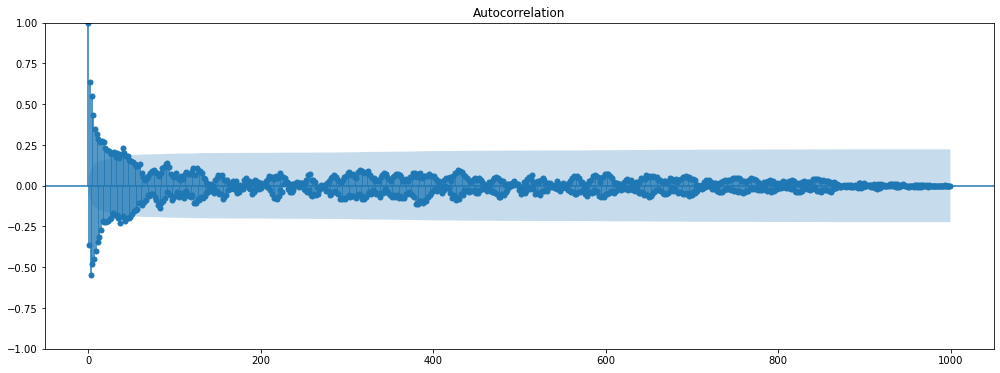

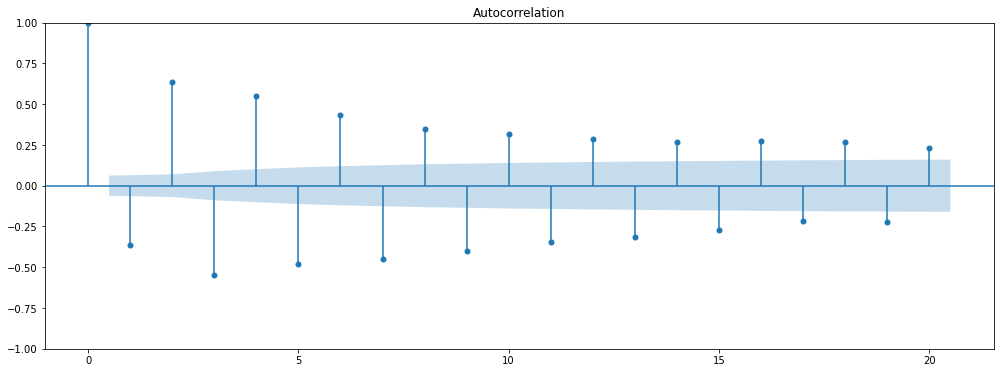

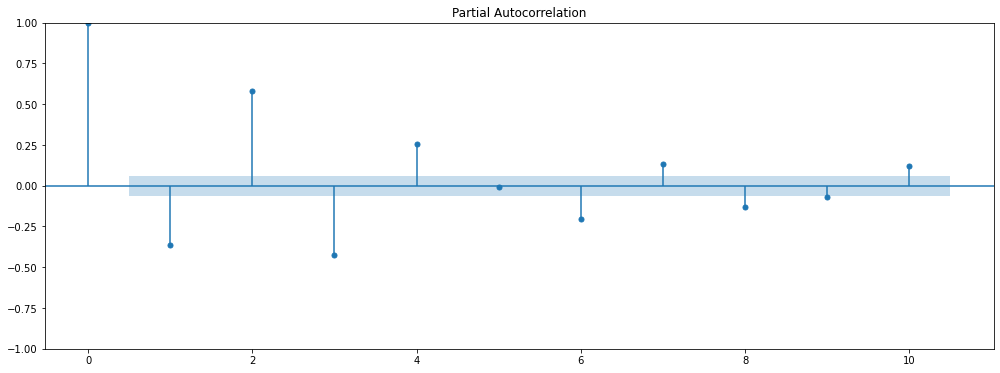

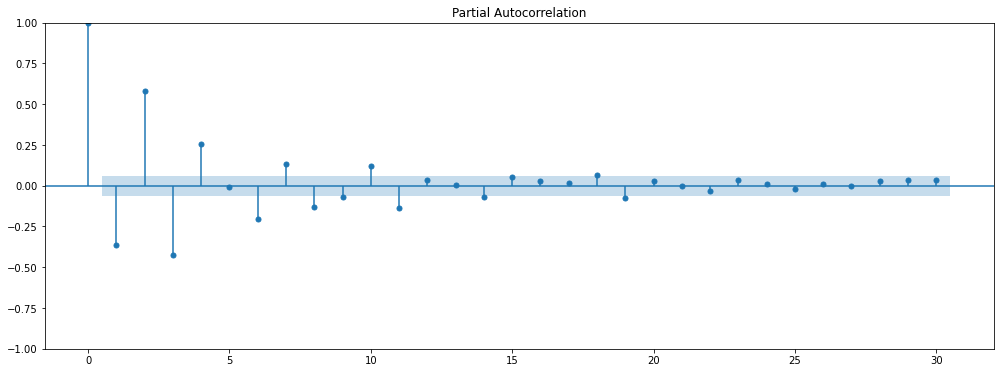

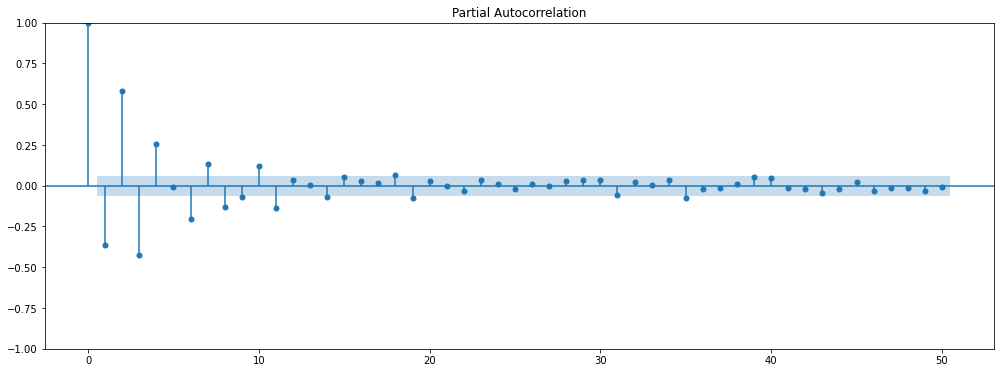

In [6]:
series = pd.read_csv('ts_4.csv')
#, header=0, index_col=0, parse_dates=True,squeeze=True)
print(len(series))
series.head()

fig, ax = plt.subplots(figsize=(17, 6))
series.plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=len(series)-1, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=20, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=10, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=30, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=50, ax= ax)
plt.show()


- Stationary
- Decay in ACF > possible AR
- No propery Shutoff in PACF. Kinda of decay.
- So since both ACF and PACF show decays, its ARMA

1000


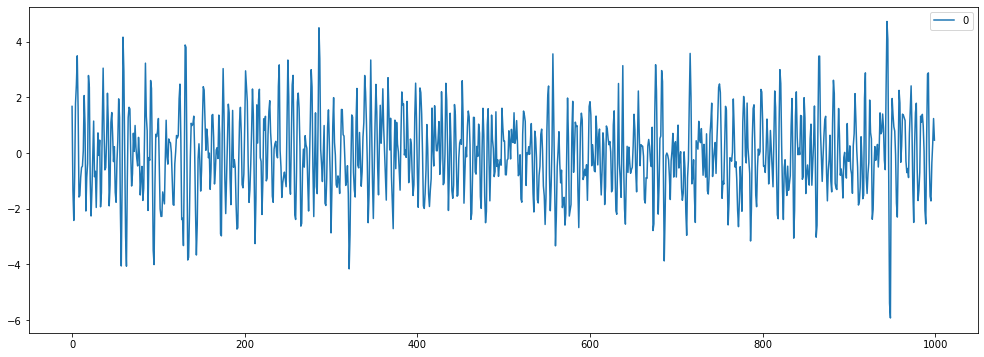

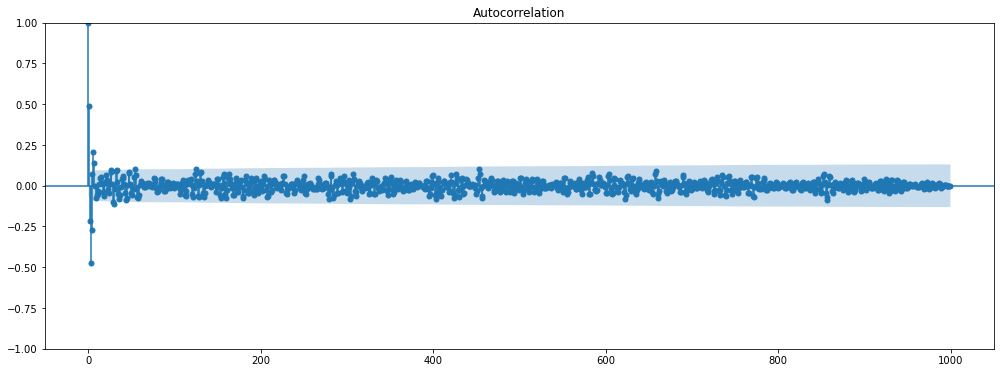

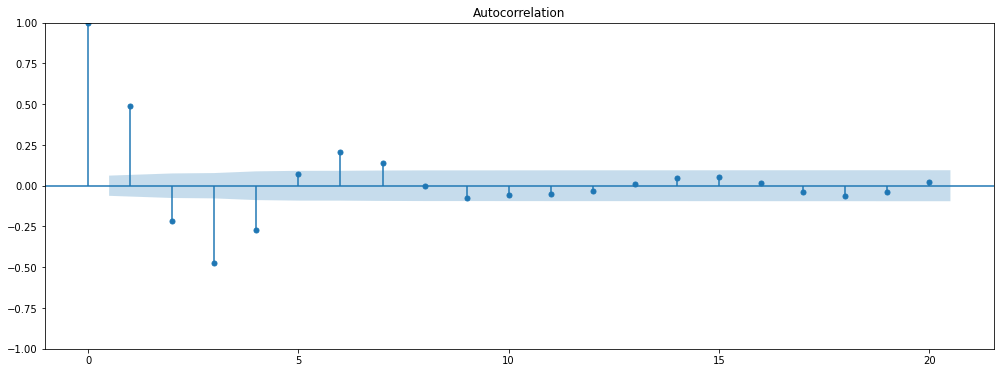

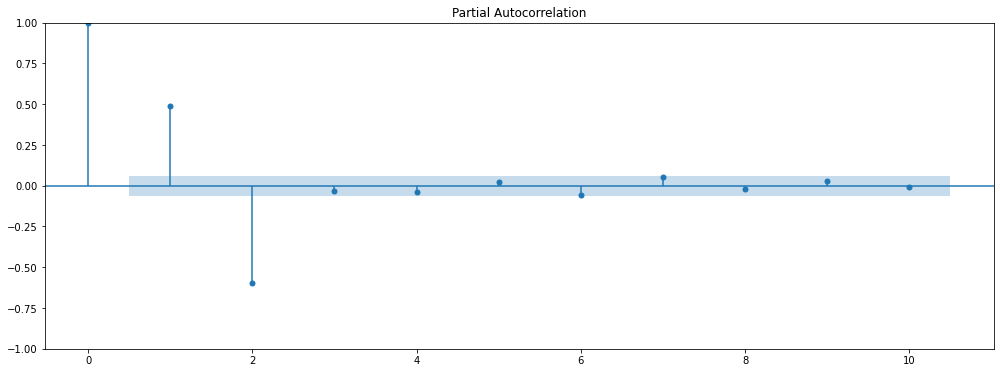

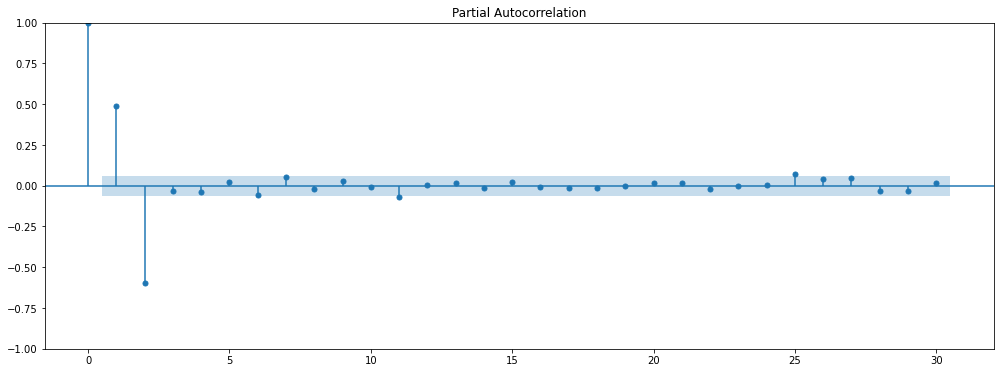

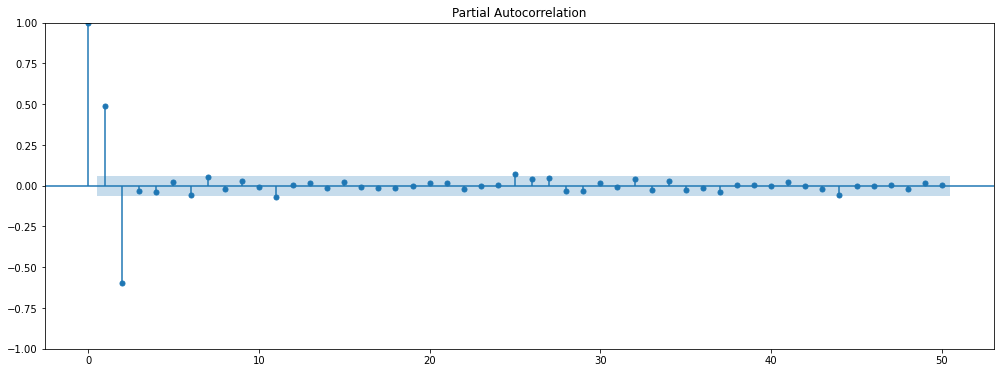

In [7]:
series = pd.read_csv('ts_1.csv')
#, header=0, index_col=0, parse_dates=True,squeeze=True)
print(len(series))
series.head()

fig, ax = plt.subplots(figsize=(17, 6))
series.plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=len(series)-1, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=20, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=10, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=30, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=50, ax= ax)
plt.show()


- Decay in ACF
- Shut of in PACF
- AR(2)

1000


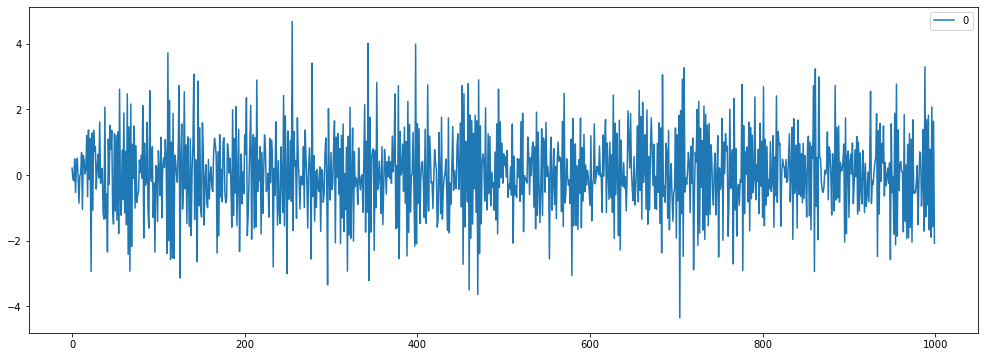

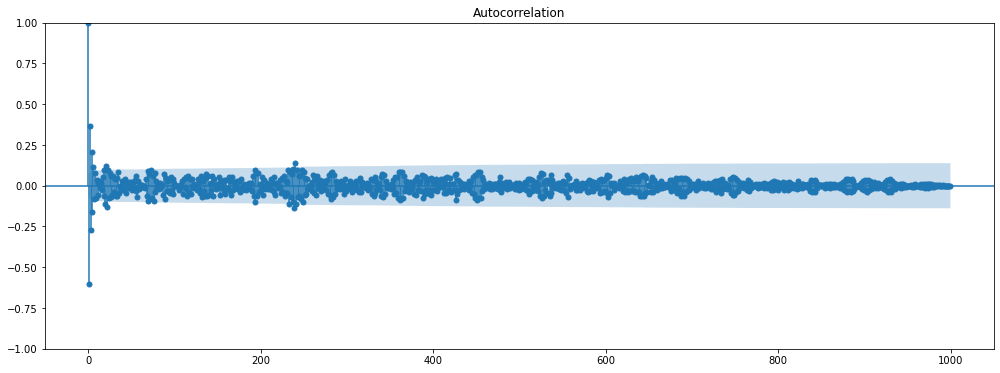

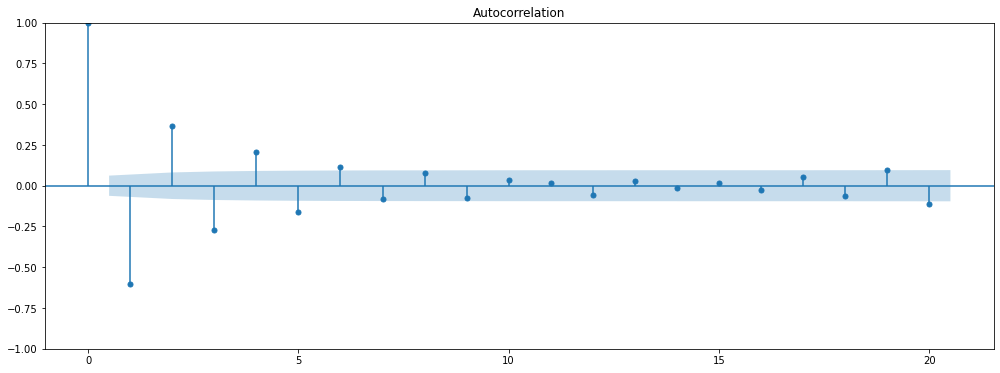

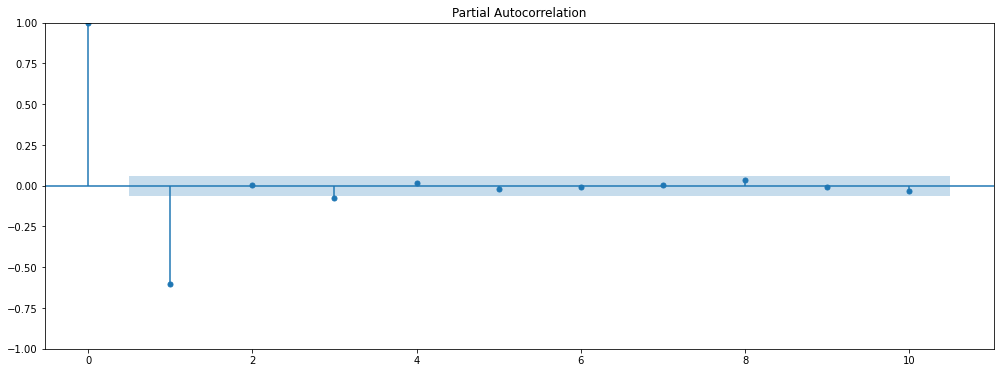

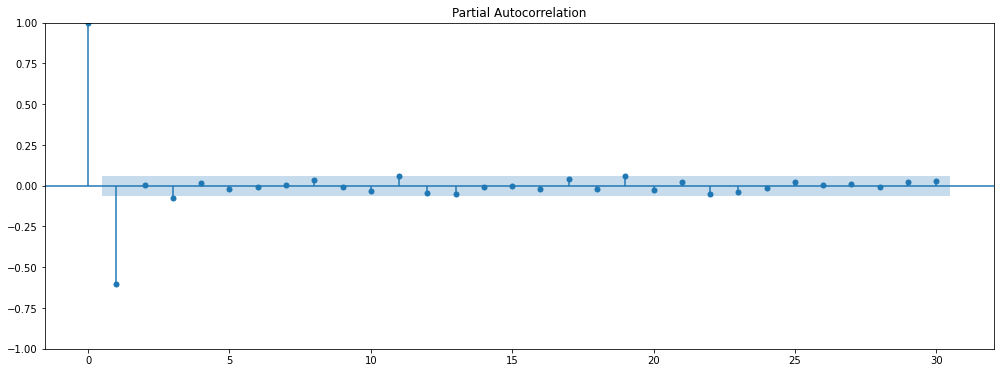

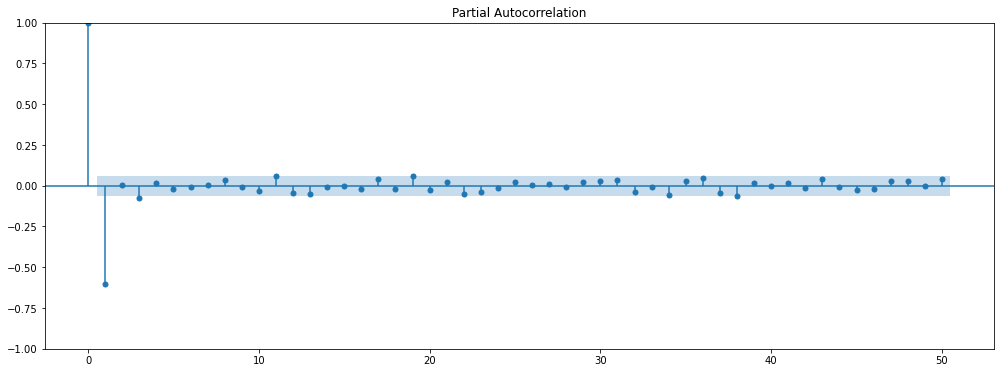

In [8]:
series = pd.read_csv('ts_3.csv')
#, header=0, index_col=0, parse_dates=True,squeeze=True)
print(len(series))
series.head()

fig, ax = plt.subplots(figsize=(17, 6))
series.plot(ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=len(series)-1, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_acf(series, lags=20, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=10, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=30, ax= ax)
plt.show()

fig, ax = plt.subplots(figsize=(17, 6))
plot_pacf(series, lags=50, ax= ax)
plt.show()


-- Decay in ACF and shutoff in PACF > AR(1)

Side note: 
A good resource for ARMA sample generation : https://goodboychan.github.io/python/datacamp/time_series_analysis/2020/06/08/02-Moving-Average-and-ARMA-Models.html
A good resource regarding stationarity https://www.asc.ohio-state.edu/de-jong.8/note1.pdf


| ACF shape | Inference |
| --- | ----------- |
| Exponential, decaying to zero | Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model. |
| Alternating positive and negative, decaying to zero | Autoregressive model. Use the partial autocorrelation plot to help identify the order. |
| One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
| Decay, starting after a few lags | Mixed autoregressive and moving average model. |
| All zero or close to zero | Data is essentially random. |
| High values at fixed intervals | Include seasonal autoregressive term |

### Forecast model building on a dataset 

##### i. Quick EDA

In [11]:
df_train = pd.read_csv('Submissions/Group project/train.csv')
df_train['Datetime'] = pd.to_datetime(df_train['Datetime'])

In [13]:
df_train.head(2)

,Datetime,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,2018-01-01 06:20:00+00:00,26.212347,28.696304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,3.976499,NaN,NaN,252.0,3.042750
1,2018-01-01 06:40:00+00:00,59.632658,29.052567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,11.091660,NaN,NaN,255.0,3.424814


In [14]:
df_train['Date'] = df_train[['Datetime']].apply(lambda x: x.dt.date)

> In order to forecast at daily level, firstly bring the data to daily level

In [16]:
# bring to daily level
df_train_dailylevel = df_train.groupby(by = ['Date']).agg(['mean'])

df_train_dailylevel.reset_index(inplace=True)
df_train_dailylevel.columns = df_train_dailylevel.columns.get_level_values(0)

df_train_dailylevel.set_index('Date', inplace=True)
df_train_dailylevel.head(2)

,Datetime,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018-01-01 17:20:32.432432384+00:00,366.223561,25.528849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.727612,74.042120,NaN,NaN,276.727612,5.263797
2018-01-02,2018-01-02 14:26:49.615384576+00:00,462.550740,25.357526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.105603,93.555723,NaN,NaN,274.105603,5.390719


<AxesSubplot:xlabel='Date'>

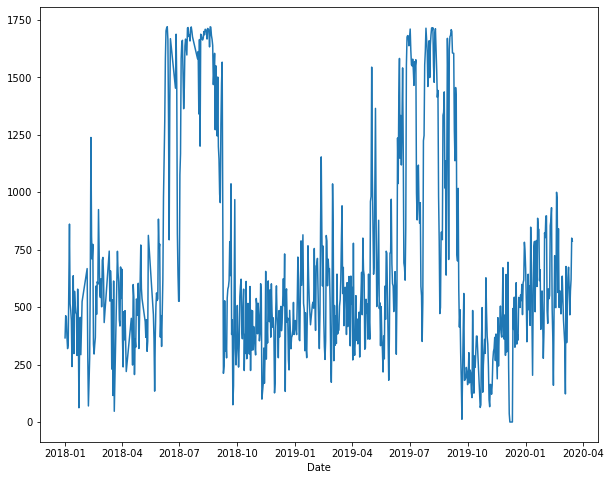

In [19]:
df_train_dailylevel.ActivePower.plot(figsize=(10,8))

<AxesSubplot:title={'center':'First 200 days only'}, xlabel='Date'>

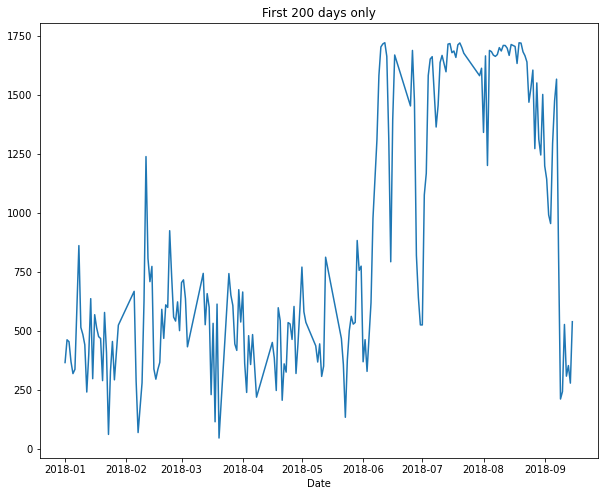

In [20]:
df_train_dailylevel.ActivePower[:200].plot(figsize=(10,8), title='First 200 days only')

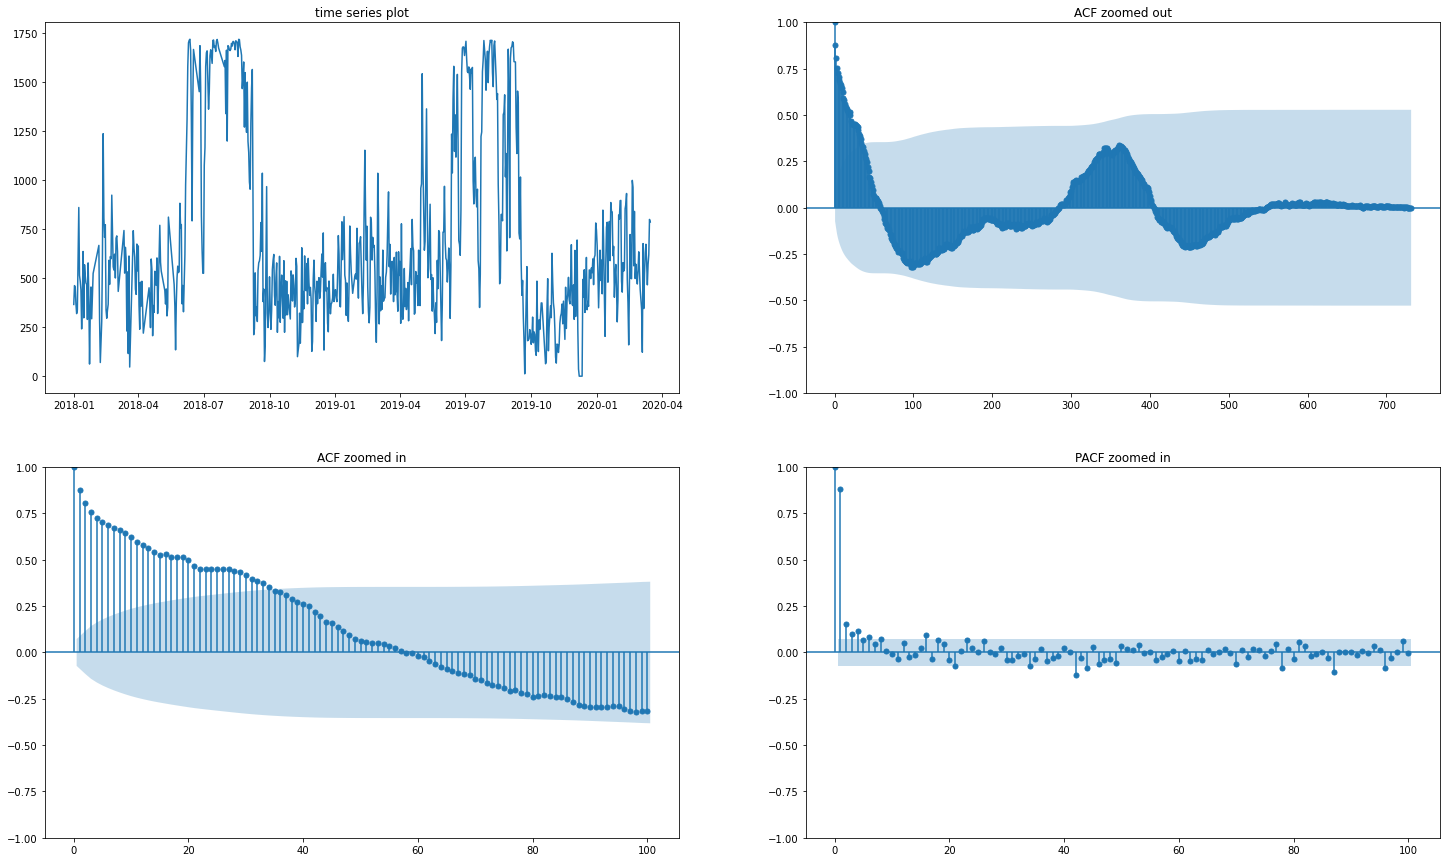

In [21]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,15))
ax1.plot(df_train_dailylevel['ActivePower'])
ax1.set_title("time series plot")
plot_acf(df_train_dailylevel['ActivePower'] ,lags=731, ax= ax2, title='ACF zoomed out')
plot_acf(df_train_dailylevel['ActivePower'] ,lags=100, ax= ax3, title='ACF zoomed in')
plot_pacf(df_train_dailylevel['ActivePower'] ,lags=100, ax= ax4, title='PACF zoomed in')
plt.show()

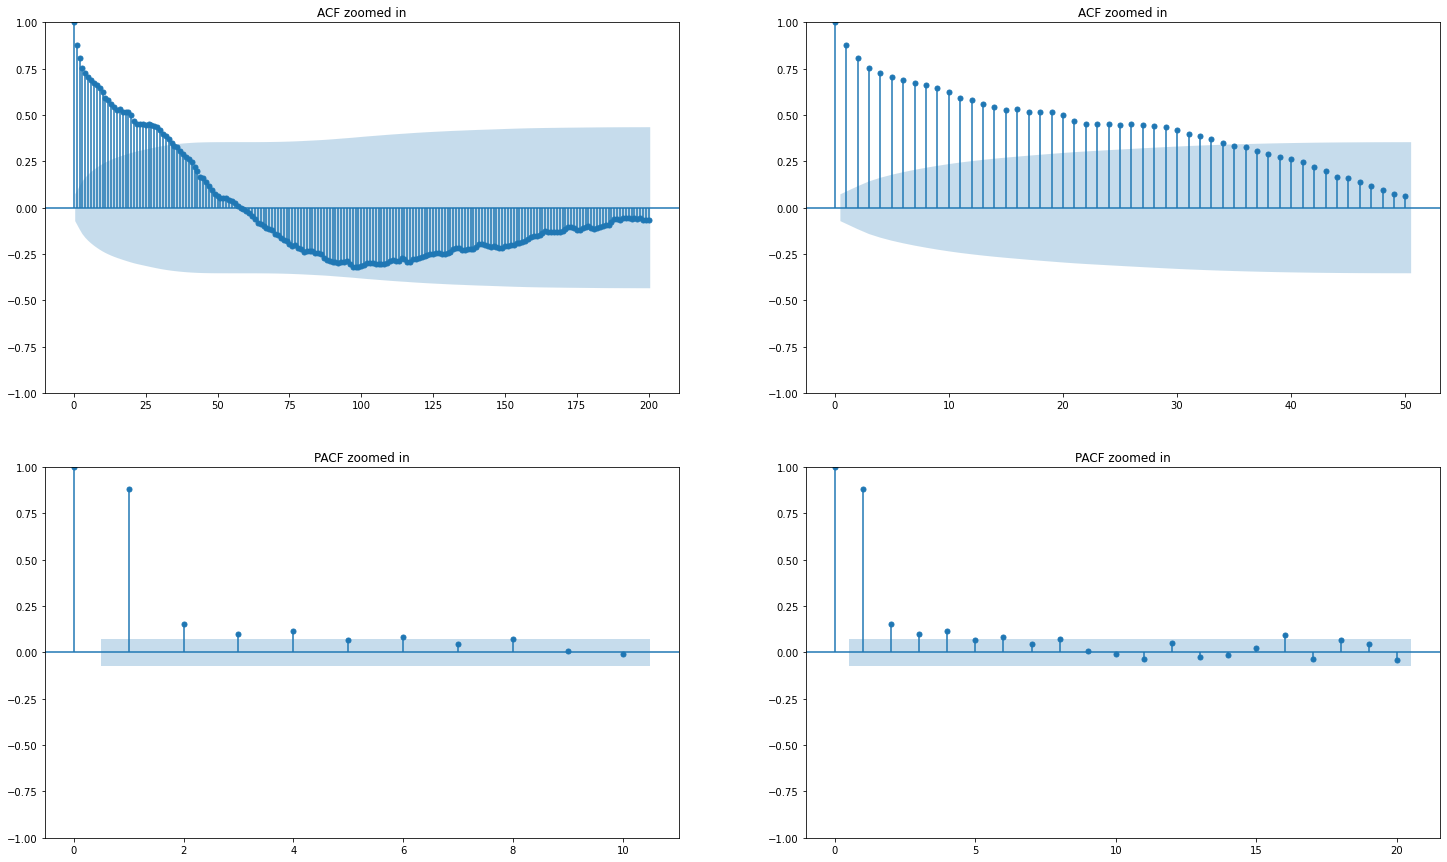

In [22]:
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,15))
plot_acf(df_train_dailylevel['ActivePower'] ,lags=200, ax= ax1, title='ACF zoomed in')
plot_acf(df_train_dailylevel['ActivePower'] ,lags=50, ax= ax2, title='ACF zoomed in')
plot_pacf(df_train_dailylevel['ActivePower'] ,lags=10, ax= ax3, title='PACF zoomed in')
plot_pacf(df_train_dailylevel['ActivePower'] ,lags=20, ax= ax4, title='PACF zoomed in')
plt.show()

Looking at above plots, Chances are seasonality is 25.

In [23]:
# Without regressors
def evaluate_ts_model_cv(X,val_set_size, cv_n_folds,trend_order,seasonal_order, metric, trend_arg=None, exog=None):
    start_idx = len(X)-(cv_n_folds*val_set_size)
    metric_cv_list = []

    for i in (range(cv_n_folds)):
        train, val = X[0:start_idx], X[start_idx:start_idx+val_set_size]
        #model = ARIMA(train, order=arma_order)
        model = sm.tsa.statespace.SARIMAX(train, order=trend_order, seasonal_order=seasonal_order, trend=trend_arg,initialization='approximate_diffuse', exog=None)
        model_fit = model.fit(disp=False)
        current_fold_predictions = model_fit.forecast(len(val))
        if metric == 'RMSE':
            metric_current_fold = mean_squared_error(current_fold_predictions, val, squared=False)
        elif metric == 'MSE':
            metric_current_fold = mean_squared_error(current_fold_predictions, val, squared=True)
        elif metric == 'MAE':
            metric_current_fold = mean_absolute_error(current_fold_predictions, val)
        elif metric == 'MAPE':
            metric_current_fold = mean_absolute_percentage_error(val,current_fold_predictions)
        metric_cv_list.append(metric_current_fold)
        start_idx = start_idx+val_set_size
    return np.mean(metric_cv_list)

def evaluate_multiple_ts_models_cv(dataset,p_values,q_values,d_values,P_values,D_values,Q_values,m,val_set_size,cv_n_folds,metric,trend_arg=None, exog=None):
    result = []
    best_metric, best_cfg = float("inf"), None
    for p in tqdm(p_values):
        for q in q_values:
            for d in d_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            trend_order = (p,d,q)
                            seasonal_order = (P,D,Q,m)
                            ts_model_orders = [(p,d,q), (P,D,Q,m)]
                            metric_eval_cv= evaluate_ts_model_cv(dataset,val_set_size, cv_n_folds,trend_order,seasonal_order,metric,trend_arg,exog)
                            result.append((ts_model_orders, metric_eval_cv))
                            if metric_eval_cv < best_metric:
                                best_metric, best_cfg = metric_eval_cv, ts_model_orders

    print('Best SARIMAX%s %s=%.3f' % (best_cfg,metric, best_metric))
    return result


In [24]:
## Prophet model fitting
#without regressors
def prophet_model_fit(df,cols, len_test, growth, changepoint_range=0.8,changepoint_prior_scale=0.05,n_changepoints=25, cap_if_logistic=None,
                     daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = None, metric='RMSE'):

    df_train_1= df.reset_index()[cols]
    df_train_1.columns =['ds','y']

    len_train = len(df_train_1)
    m = Prophet(growth=growth,changepoint_range=changepoint_range,changepoint_prior_scale=changepoint_prior_scale, \
                yearly_seasonality = yearly_seasonality ,daily_seasonality = daily_seasonality, \
                n_changepoints=n_changepoints
            )
    
    if monthly_seasonality_period:
        m.add_seasonality(name='monthly', period=monthly_seasonality_period, fourier_order=5)

    if growth == 'logistic':
        df_train_1['cap'] = cap_if_logistic

    print(m.growth,m.changepoint_prior_scale, m.changepoint_range, m.daily_seasonality, m.yearly_seasonality, m.n_changepoints)
    m.fit(df_train_1)
    
    future = m.make_future_dataframe(periods=len_test) #Dataframe with forecasting steps
    
    if growth == 'logistic':
        future['cap'] = cap_if_logistic

    forecast = m.predict(future)

    if metric == 'RMSE':
        metric_train = mean_squared_error(df_train_1['y'],forecast.head(len_train)['yhat'],squared=False)


    elif metric == 'MSE':
        metric_train = mean_squared_error(df_train_1['y'],forecast.head(len_train)['yhat'],squared=True)
        
    elif metric == 'MAE':
        metric_train = mean_absolute_error(df_train_1['y'],forecast.head(len_train)['yhat'])
        
    elif metric == 'MAPE':
        metric_train = mean_absolute_percentage_error(df_train_1['y'],forecast.head(len_train)['yhat'])
        
                      
    print('Metric train:',metric_train)
    
    return m, forecast, metric_train

In [25]:
## Prophet model fitting - CV
# without regressors
def prophet_model_fit_cv(df,cols, growth,cv_n_folds, val_set_size, changepoint_range=0.8,changepoint_prior_scale=0.05,n_changepoints=25, cap_if_logistic=None,
                     daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = None, metric='RMSE'):

    df_train_1= df.reset_index()[cols]
    df_train_1.columns =['ds','y']

    len_train = len(df_train_1)
    
    metric_cv_list = []
    start_idx = len(df_train_1)-(cv_n_folds*val_set_size)
    for i in (range(cv_n_folds)):
        train, val = df_train_1[0:start_idx], df_train_1[start_idx:start_idx+val_set_size]

        m = Prophet(growth=growth,changepoint_range=changepoint_range,changepoint_prior_scale=changepoint_prior_scale, \
                    yearly_seasonality = yearly_seasonality ,daily_seasonality = daily_seasonality, \
                    n_changepoints=n_changepoints
                )
        
        if monthly_seasonality_period:
            m.add_seasonality(name='monthly', period=monthly_seasonality_period, fourier_order=5)

        if growth == 'logistic':
            train['cap'] = cap_if_logistic

        print(m.growth,m.changepoint_prior_scale, m.changepoint_range, m.daily_seasonality, m.yearly_seasonality, m.n_changepoints)

        m.fit(train)
        
        future = m.make_future_dataframe(periods=val_set_size) #Dataframe with forecasting steps
        
        if growth == 'logistic':
            future['cap'] = cap_if_logistic

        forecast = m.predict(future)

        if metric == 'RMSE':
            metric_current_fold = mean_squared_error(val['y'],forecast.head(val_set_size)['yhat'],squared=False)


        elif metric == 'MSE':
            metric_current_fold = mean_squared_error(val['y'],forecast.head(val_set_size)['yhat'],squared=True)
            
        elif metric == 'MAE':
            metric_current_fold = mean_absolute_error(val['y'],forecast.head(val_set_size)['yhat'])
            
        elif metric == 'MAPE':
            metric_current_fold = mean_absolute_percentage_error(val['y'],forecast.head(val_set_size)['yhat'])
        
        print('Metric val current fold:',metric_current_fold)
        metric_cv_list.append(metric_current_fold) 
        start_idx = start_idx+val_set_size
        
    metric_val = np.mean(metric_cv_list)
    print('Metric val:',metric_val)
    
    return m, forecast, metric_val

In [26]:
## ETS model fitting - CV
#without regressor
def ets_model_fit_cv(df,cols,cv_n_folds, val_set_size, \
                trend,seasonal,seasonal_periods,damped_trend, metric='RMSE'):

    df_train_1= df.reset_index()[cols]
    df_train_1.columns =['ds','y']

    len_train = len(df_train_1)
    
    metric_cv_list = []
    start_idx = len(df_train_1)-(cv_n_folds*val_set_size)
    for i in (range(cv_n_folds)):
        train, val = df_train_1[0:start_idx], df_train_1[start_idx:start_idx+val_set_size]

        m = ExponentialSmoothing(train['y'], trend=trend, seasonal=seasonal, \
            seasonal_periods=seasonal_periods, damped_trend=damped_trend)

        print(m.trend,m.seasonal, m.seasonal_periods, m.damped_trend)

        ets_model1 = m.fit()

        if metric == 'RMSE':
            metric_current_fold = mean_squared_error(val['y'],ets_model1.predict(0,val_set_size-1),squared=False)

        elif metric == 'MSE':
            metric_current_fold = mean_squared_error(val['y'],ets_model1.predict(0,val_set_size-1),squared=True)
            
        elif metric == 'MAE':
            metric_current_fold = mean_absolute_error(val['y'],ets_model1.predict(0,val_set_size-1))
            
        elif metric == 'MAPE':
            metric_current_fold = mean_absolute_percentage_error(val['y'],ets_model1.predict(0,val_set_size-1))
        
        print('Metric val current fold:',metric_current_fold)
        metric_cv_list.append(metric_current_fold) 
        start_idx = start_idx+val_set_size
        
    metric_val = np.mean(metric_cv_list)
    print('Metric val:',metric_val)
    
    return ets_model1, metric_val

##### Trying prophet fits

In [27]:
ts_model, forecast_df,metric_val = prophet_model_fit_cv(df_train_dailylevel,['Date','ActivePower'], \
    val_set_size=15, cv_n_folds=8,\
    growth='linear', changepoint_range=0.9,\
    changepoint_prior_scale=0.05, metric='RMSE')

14:12:07 - cmdstanpy - INFO - Chain [1] start processing
14:12:08 - cmdstanpy - INFO - Chain [1] done processing


linear 0.05 0.9 auto auto 25


14:12:08 - cmdstanpy - INFO - Chain [1] start processing
14:12:08 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 304.58142080810495
linear 0.05 0.9 auto auto 25


14:12:08 - cmdstanpy - INFO - Chain [1] start processing
14:12:08 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 457.3000884348389
linear 0.05 0.9 auto auto 25


14:12:08 - cmdstanpy - INFO - Chain [1] start processing
14:12:09 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 196.89772581597555
linear 0.05 0.9 auto auto 25


14:12:09 - cmdstanpy - INFO - Chain [1] start processing
14:12:09 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 193.81360276203722
linear 0.05 0.9 auto auto 25


14:12:09 - cmdstanpy - INFO - Chain [1] start processing
14:12:09 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 193.44874547426002
linear 0.05 0.9 auto auto 25


14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 245.3006778410145
linear 0.05 0.9 auto auto 25


14:12:10 - cmdstanpy - INFO - Chain [1] start processing
14:12:10 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 188.61144536333606
linear 0.05 0.9 auto auto 25
Metric val current fold: 188.04276632023894
Metric val: 245.99955910247576


In [28]:
ts_model, forecast_df,metric_val = prophet_model_fit_cv(df_train_dailylevel, ['Date','ActivePower'], \
    val_set_size=15, cv_n_folds=8,\
    growth='linear', changepoint_range=0.9,\
    monthly_seasonality_period=30,
    changepoint_prior_scale=0.05, metric='RMSE')

14:12:18 - cmdstanpy - INFO - Chain [1] start processing
14:12:18 - cmdstanpy - INFO - Chain [1] done processing


linear 0.05 0.9 auto auto 25


14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 340.73310626682354
linear 0.05 0.9 auto auto 25


14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 502.00322938414865
linear 0.05 0.9 auto auto 25


14:12:19 - cmdstanpy - INFO - Chain [1] start processing
14:12:19 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 234.8830489938419
linear 0.05 0.9 auto auto 25


14:12:20 - cmdstanpy - INFO - Chain [1] start processing
14:12:20 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 230.6938687617297
linear 0.05 0.9 auto auto 25


14:12:20 - cmdstanpy - INFO - Chain [1] start processing
14:12:20 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 193.10365264089535
linear 0.05 0.9 auto auto 25


14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 241.74940892958767
linear 0.05 0.9 auto auto 25


14:12:21 - cmdstanpy - INFO - Chain [1] start processing
14:12:21 - cmdstanpy - INFO - Chain [1] done processing


Metric val current fold: 190.22414726960523
linear 0.05 0.9 auto auto 25
Metric val current fold: 184.64253657197074
Metric val: 264.7541248523254


In [30]:
ts_model, forecast_df,metric_train = prophet_model_fit(df_train_dailylevel, ['Date','ActivePower'], len_test=15, \
    growth='linear', changepoint_range=0.9,changepoint_prior_scale=0.08,\
    monthly_seasonality_period=25,\
    n_changepoints=75,\
    metric='RMSE')

14:12:59 - cmdstanpy - INFO - Chain [1] start processing
14:12:59 - cmdstanpy - INFO - Chain [1] done processing


linear 0.08 0.9 auto auto 75
Metric train: 246.49333265657378


In [31]:
plot_plotly(ts_model, forecast_df)

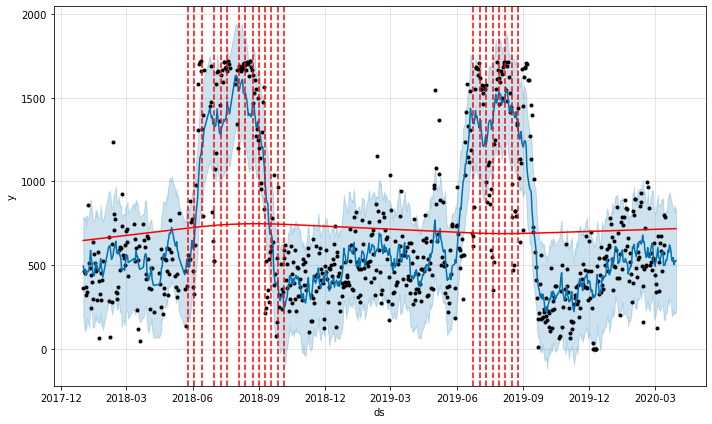

In [32]:
fig = ts_model.plot(forecast_df)
a = add_changepoints_to_plot(fig.gca(), ts_model, forecast_df)

In [33]:
#plotting components
plot_components_plotly(ts_model, forecast_df)

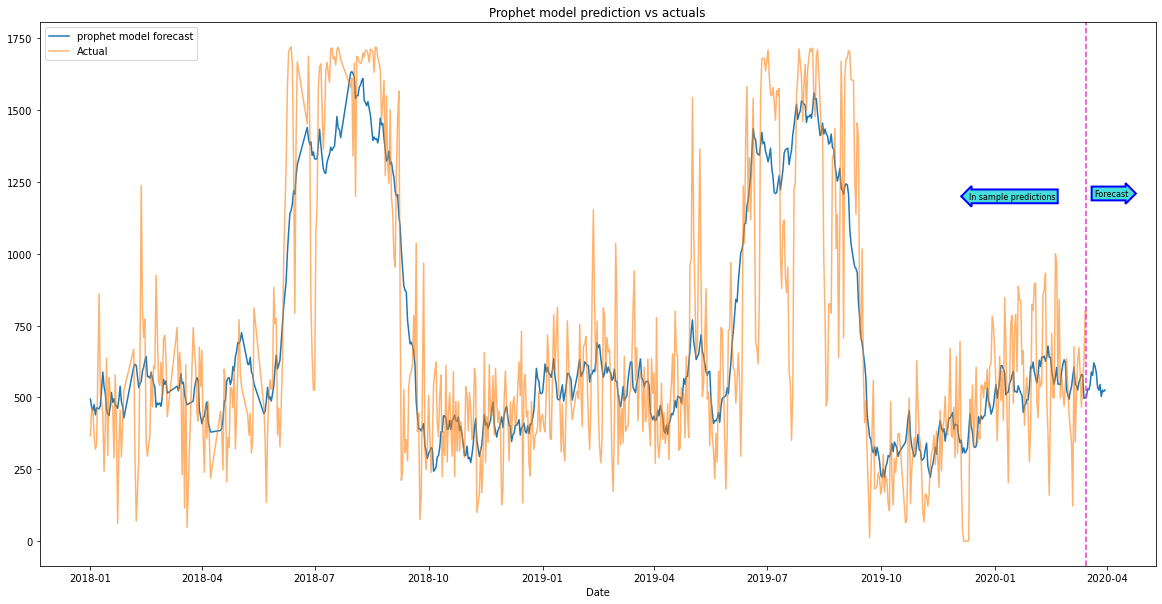

In [34]:

fig,ax1 = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('Prophet model prediction vs actuals')
ax1.plot(forecast_df['ds'], forecast_df['yhat'], label='prophet model forecast')
df_train_dailylevel['ActivePower'].plot(ax=ax1,label='Actual', alpha=0.6)

plt.axvline(x='2020-03-15',color ='#eb34d8',ls='--')
ax1.text(
    '2020-01-15', 1200, "In sample predictions", ha="center", va="center", rotation=0, size=8,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="#47ded9", ec="b", lw=2))
ax1.text(
    '2020-04-04', 1210, "Forecast", ha="center", va="center", rotation=0, size=8,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#47ded9", ec="b", lw=2))            
plt.legend()

##### ETS model fit trail

In [35]:
ts_model, metric_val = ets_model_fit_cv(df_train_dailylevel,['Date','ActivePower'], \
                val_set_size=15, cv_n_folds=8,\
                trend="add", seasonal="add",\
                     seasonal_periods=25, damped_trend=False, metric='RMSE')
# with additive trend and additive seasonal components, and included trend component is not damped

add add 25 False
Metric val current fold: 183.18269800740777
add add 25 False
Metric val current fold: 358.8745301385301
add add 25 False
Metric val current fold: 194.73200244202678
add add 25 False
Metric val current fold: 248.04176964142636
add add 25 False
Metric val current fold: 277.91637160504786
add add 25 False
Metric val current fold: 337.65974405756646
add add 25 False
Metric val current fold: 296.59641885570954
add add 25 False
Metric val current fold: 211.95404102517531
Metric val: 263.6196969716113


##### SARIMA trail

In [36]:
sarima_model1 = sm.tsa.statespace.SARIMAX(df_train_dailylevel['ActivePower'], \
    order=(0, 0, 2), seasonal_order=(1,0,1,25), trend= None)
sarima_model1_res = sarima_model1.fit(disp=False)
print(sarima_model1_res.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          ActivePower   No. Observations:                  734
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 25)   Log Likelihood               -5205.340
Date:                              Fri, 27 Jan 2023   AIC                          10420.680
Time:                                      14:14:26   BIC                          10443.673
Sample:                                           0   HQIC                         10429.549
                                              - 734                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8648      0.035     24.491      0.000       0.796       0.934
ma.L2          0.49

In [37]:
#RMSE train
print('RMSE train (SARIMA model):', mean_squared_error(df_train_dailylevel['ActivePower'],list(sarima_model1_res.predict()),squared=False))

RMSE train (SARIMA model): 290.8962940505819


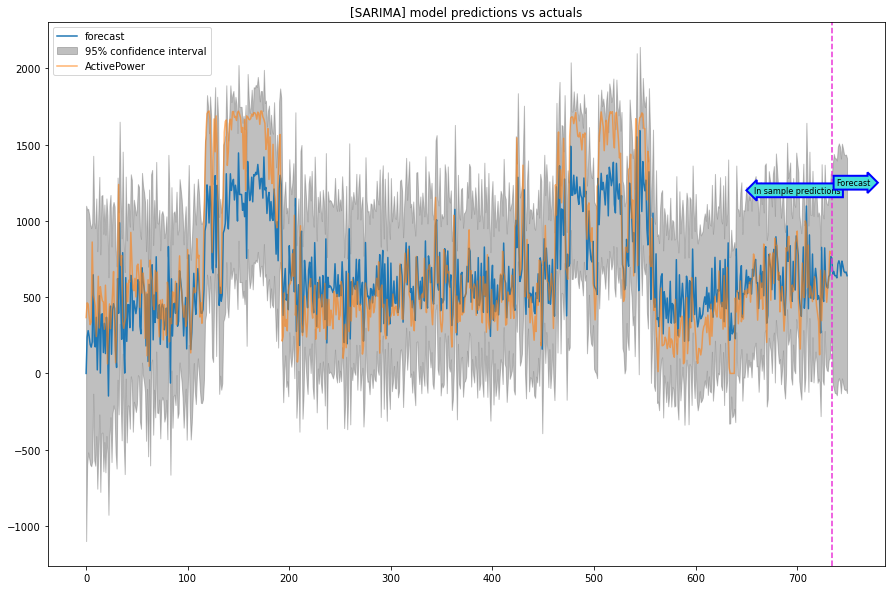

In [38]:
fig,ax1 = plt.subplots(1, 1, figsize=(15,10))
plot_predict(sarima_model1_res,start=0, end=len(df_train_dailylevel)+15, ax = ax1, label='model forecast')
ax1.set_title('[SARIMA] model predictions vs actuals')
#pd.Series(df4_train['MedianSoldPrice_AllHomes'].values).plot(ax=ax1,label='Actual')
df_train_dailylevel['ActivePower'].reset_index().plot(ax=ax1,label='Actual', alpha=0.6)
# pd.concat([df4_train['MedianSoldPrice_AllHomes'], df4_test['Median House Price']], axis=0).plot(ax=ax1,label='Actual')
plt.axvline(x=734,color ='#eb34d8',ls='--')
ax1.text(
    700, 1200, "In sample predictions", ha="center", va="center", rotation=0, size=8,
    bbox=dict(boxstyle="larrow,pad=0.3", fc="#47ded9", ec="b", lw=2))
ax1.text(
    755, 1250, "Forecast", ha="center", va="center", rotation=0, size=8,
    bbox=dict(boxstyle="rarrow,pad=0.3", fc="#47ded9", ec="b", lw=2))            
plt.legend()

##### With regressors

In [39]:
df_train_dailylevel.isna().sum()/len(df_train_dailylevel)*100

Datetime                         0.000000
ActivePower                      0.000000
AmbientTemperatue                0.544959
BearingShaftTemperature         37.193460
Blade1PitchAngle                58.310627
Blade2PitchAngle                58.310627
Blade3PitchAngle                58.310627
GearboxBearingTemperature       37.193460
GearboxOilTemperature           37.193460
GeneratorRPM                    37.193460
GeneratorWinding1Temperature    37.193460
GeneratorWinding2Temperature    37.193460
HubTemperature                  37.193460
MainBoxTemperature              37.193460
NacellePosition                  0.408719
ReactivePower                    0.000000
RotorRPM                        37.193460
TurbineStatus                   36.648501
WindDirection                    0.408719
WindSpeed                        0.136240
dtype: float64

In [40]:
# Dropping NAs in relevant columns

df_train_dailylevel_noNA = df_train_dailylevel[['ActivePower','WindSpeed']].dropna()
df_train_dailylevel_noNA.head()

,ActivePower,WindSpeed
Date,,
2018-01-01,366.223561,5.263797
2018-01-02,462.550740,5.390719
2018-01-03,454.417752,5.295225
2018-01-04,369.952190,5.094994
2018-01-05,319.446595,4.915224


In [41]:
sc = MinMaxScaler()

In [42]:
df_train_dailylevel_noNA_sc = sc.fit_transform(df_train_dailylevel_noNA)

> SARIMAX (with regressors)

In [43]:
sarima_model_2=auto_arima(df_train_dailylevel_noNA_sc[:,0], 
                 exogenous= df_train_dailylevel_noNA_sc[:,1:],
                 start_p=0, start_q=0, 
                 max_p=5, max_q=5, 
                 max_d=1,max_D=2,
                 m=25, max_P=5, max_Q=5,
                 trace=True,
                 error_action='ignore', 
                 suppress_warnings=True,information_criterion='oob', n_jobs = -1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[25] intercept   : AIC=-2070.695, Time=2.52 sec
 ARIMA(0,0,0)(0,0,0)[25] intercept   : AIC=-2063.173, Time=0.13 sec
 ARIMA(1,0,0)(1,0,0)[25] intercept   : AIC=-2368.565, Time=1.83 sec
 ARIMA(0,0,1)(0,0,1)[25] intercept   : AIC=-2286.709, Time=1.86 sec
 ARIMA(0,0,0)(0,0,0)[25]             : AIC=-1926.141, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[25] intercept   : AIC=-2368.058, Time=0.21 sec
 ARIMA(1,0,0)(2,0,0)[25] intercept   : AIC=-2367.222, Time=18.05 sec
 ARIMA(1,0,0)(1,0,1)[25] intercept   : AIC=-2367.013, Time=2.22 sec
 ARIMA(1,0,0)(0,0,1)[25] intercept   : AIC=-2368.417, Time=1.90 sec
 ARIMA(1,0,0)(2,0,1)[25] intercept   : AIC=-2365.125, Time=17.94 sec
 ARIMA(0,0,0)(1,0,0)[25] intercept   : AIC=-2071.211, Time=1.09 sec
 ARIMA(2,0,0)(1,0,0)[25] intercept   : AIC=-2368.403, Time=3.57 sec
 ARIMA(1,0,1)(1,0,0)[25] intercept   : AIC=-2368.642, Time=3.59 sec
 ARIMA(1,0,1)(0,0,0)[25] intercept   : AIC=-2368.054, Time=0.38 sec
 AR

In [44]:
#Sarimax functions
def evaluate_ts_model_cv_with_regressor(X,val_set_size, cv_n_folds,trend_order,seasonal_order, metric, trend_arg=None, exog='WindSpeed'):
    start_idx = len(X)-(cv_n_folds*val_set_size)
    metric_cv_list = []

    for i in (range(cv_n_folds)):
        train_3, val_3 = X[0:start_idx], X[start_idx:start_idx+val_set_size]
        #model = ARIMA(train, order=arma_order)
        sc_2= MinMaxScaler()
        train_3['WindSpeed_scaled'] = sc_2.fit_transform(train_3[['WindSpeed']])
        model = sm.tsa.statespace.SARIMAX(train_3['ActivePower'], order=trend_order, seasonal_order=seasonal_order,\
             trend=trend_arg,initialization='approximate_diffuse', exog=train_3['WindSpeed_scaled'])
        model_fit = model.fit(disp=False)

        ets_model_windspeed_1 = ExponentialSmoothing(train_3['WindSpeed'], \
                trend="add", seasonal="add",\
                seasonal_periods=25, damped_trend=True).fit()

        val_3['WindSpeed'] = ets_model_windspeed_1.forecast(val_set_size).values
        val_3['WindSpeed_scaled']= sc_2.transform(val_3[['WindSpeed']])

        
        current_fold_predictions = model_fit.forecast(val_set_size, exog=val_3[['WindSpeed_scaled']])
        
        
        if metric == 'RMSE':
            metric_current_fold = mean_squared_error(current_fold_predictions, val_3['ActivePower'], squared=False)
        elif metric == 'MSE':
            metric_current_fold = mean_squared_error(current_fold_predictions, val_3['ActivePower'], squared=True)
        elif metric == 'MAE':
            metric_current_fold = mean_absolute_error(current_fold_predictions, val_3['ActivePower'])
        elif metric == 'MAPE':
            metric_current_fold = mean_absolute_percentage_error(val_3['ActivePower'],current_fold_predictions)
        metric_cv_list.append(metric_current_fold)
        start_idx = start_idx+val_set_size
    return np.mean(metric_cv_list)

In [45]:
evaluate_ts_model_cv_with_regressor(pd.DataFrame(df_train_dailylevel_noNA,columns = ['ActivePower','WindSpeed']),
val_set_size=15, cv_n_folds =8,trend_order=(1, 0, 1),seasonal_order=(1,0,0,25), metric='RMSE', 
trend_arg=None, exog='WindSpeed')

258.4484989303226

In [46]:
sarima_model2 = sm.tsa.statespace.SARIMAX(pd.DataFrame(df_train_dailylevel_noNA_sc)[0], \
    order=(1, 0, 1), seasonal_order=(1,0,0,25), trend= None, exog=pd.DataFrame(df_train_dailylevel_noNA_sc).iloc[:,1:])
sarima_model2_res = sarima_model2.fit(disp=False)
print(sarima_model2_res.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  733
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 25)   Log Likelihood                1171.595
Date:                             Fri, 27 Jan 2023   AIC                          -2333.189
Time:                                     14:18:14   BIC                          -2310.204
Sample:                                          0   HQIC                         -2324.323
                                             - 733                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
1              1.3825      0.011    127.178      0.000       1.361       1.404
ar.L1          0.7599      

In [47]:
df_train_dailylevel_noNA_sc_backscaled = \
    pd.DataFrame(sc.inverse_transform(pd.DataFrame({ 'col1' : sarima_model2_res.predict(),\
         'col2': np.ravel(df_train_dailylevel_noNA_sc[:,1:])})), columns=['ActivePower_pred','WindSpeed'])

df_train_dailylevel_noNA_sc_backscaled.index= df_train_dailylevel_noNA.index
df_train_dailylevel_noNA_sc_backscaled.head(2)

,ActivePower_pred,WindSpeed
Date,,
2018-01-01,497.006622,5.263797
2018-01-02,439.772820,5.390719


In [48]:
#RMSE train on scaled data
print('RMSE train (SARIMA model):', mean_squared_error(pd.DataFrame(df_train_dailylevel_noNA_sc)[0],list(sarima_model2_res.predict()),squared=False))

RMSE train (SARIMA model): 0.04894695002365384


In [49]:
#RMSE train on back scaled data
print('RMSE train (SARIMA model):',
 mean_squared_error(df_train_dailylevel_noNA_sc_backscaled['ActivePower_pred'],\
        df_train_dailylevel_noNA['ActivePower'],\
        squared=False))

RMSE train (SARIMA model): 84.19858650382515


> Noticing a significant improvement

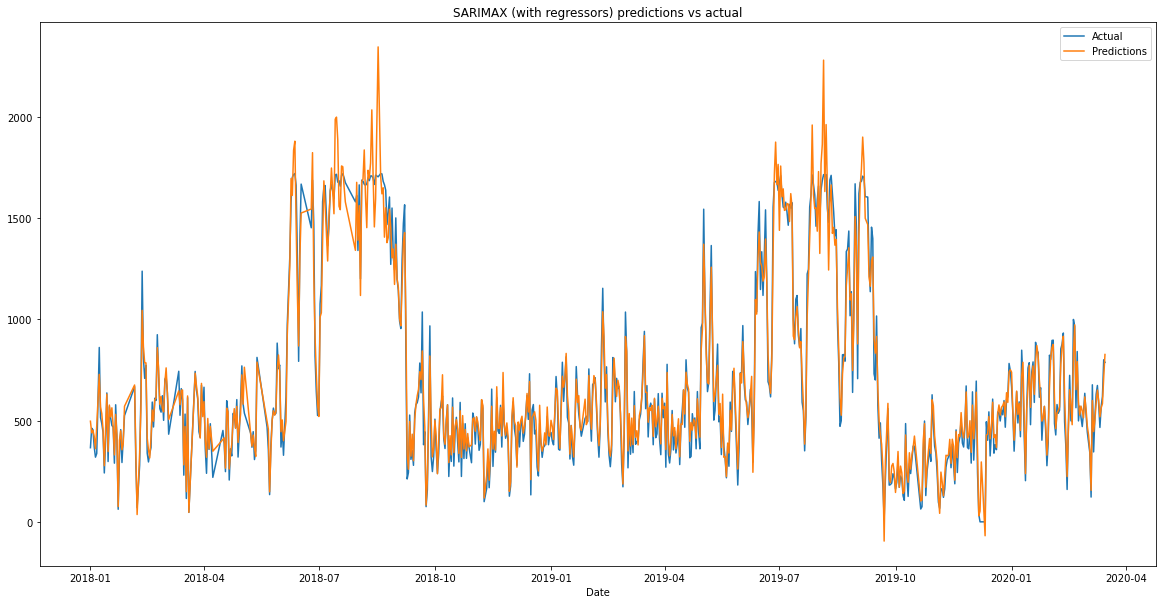

In [50]:
fig,ax1 = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('SARIMAX (with regressors) predictions vs actual')
df_train_dailylevel_noNA['ActivePower'].plot(ax=ax1, label='Actual')
df_train_dailylevel_noNA_sc_backscaled['ActivePower_pred'].plot(ax=ax1, label='Predictions')
plt.legend()
plt.show()

##### prophet with regressor trail

In [51]:
## Prophet model fitting

def prophet_model_fit_with_regressor(df,cols, len_test, growth, changepoint_range=0.8,changepoint_prior_scale=0.05,n_changepoints=25, cap_if_logistic=None,
                     daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = None, metric='RMSE',\
                    regressors_list=[]  ):

    df_train_1= df.reset_index()[cols+regressors_list]
    df_train_1.columns =['ds','y']+regressors_list

    len_train = len(df_train_1)
    m = Prophet(growth=growth,changepoint_range=changepoint_range,changepoint_prior_scale=changepoint_prior_scale, \
                yearly_seasonality = yearly_seasonality ,daily_seasonality = daily_seasonality, \
                n_changepoints=n_changepoints
            )
    

    if len(regressors_list)>0:
        for i in regressors_list: m.add_regressor(i)

    if monthly_seasonality_period:
        m.add_seasonality(name='monthly', period=monthly_seasonality_period, fourier_order=5)

    if growth == 'logistic':
        df_train_1['cap'] = cap_if_logistic

    print(m.growth,m.changepoint_prior_scale, m.changepoint_range, m.daily_seasonality, m.yearly_seasonality, m.n_changepoints)
    m.fit(df_train_1)
    
    #future = m.make_future_dataframe(periods=len_test) #Dataframe with forecasting steps
    
    if len(regressors_list)>0:
        future =  df_train_1.filter(['ds']+regressors_list)

    if growth == 'logistic':
        future['cap'] = cap_if_logistic

    forecast = m.predict(future)

    if metric == 'RMSE':
        metric_train = mean_squared_error(df_train_1['y'],forecast.head(len_train)['yhat'],squared=False)


    elif metric == 'MSE':
        metric_train = mean_squared_error(df_train_1['y'],forecast.head(len_train)['yhat'],squared=True)
        
    elif metric == 'MAE':
        metric_train = mean_absolute_error(df_train_1['y'],forecast.head(len_train)['yhat'])
        
    elif metric == 'MAPE':
        metric_train = mean_absolute_percentage_error(df_train_1['y'],forecast.head(len_train)['yhat'])
        
                      
    print('Metric train:',metric_train)
    
    return m, forecast, metric_train

In [52]:
## Prophet model fitting
# with regressor
def prophet_model_fit_cv_with_regressor(df,cols, len_test, growth,cv_n_folds, changepoint_range=0.8,changepoint_prior_scale=0.05,n_changepoints=25, cap_if_logistic=None,
                     daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = None, metric='RMSE',\
                    regressors_list=[]  ):

    df_train_1= df.reset_index()[cols+regressors_list]
    df_train_1.columns =['ds','y']+regressors_list
    metric_cv_list = []
    start_idx = len(df_train_1)-(cv_n_folds*len_test)
    print(start_idx, len(df_train_1))
    for i in (range(cv_n_folds)):
        train, val = df_train_1[0:start_idx], df_train_1[start_idx:start_idx+len_test]
        print(len(val),len(train))
        m = Prophet(growth=growth,changepoint_range=changepoint_range,changepoint_prior_scale=changepoint_prior_scale, \
                    yearly_seasonality = yearly_seasonality ,daily_seasonality = daily_seasonality, \
                    n_changepoints=n_changepoints
                )
        
        if monthly_seasonality_period:
            m.add_seasonality(name='monthly', period=monthly_seasonality_period, fourier_order=5)

        if growth == 'logistic':
            train['cap'] = cap_if_logistic

        print(m.growth,m.changepoint_prior_scale, m.changepoint_range, m.daily_seasonality, m.yearly_seasonality, m.n_changepoints)

        m.fit(train)
        
        ## Predict regressor in val period
        ets_model_windspeed_1 = ExponentialSmoothing(train[','.join(regressors_list)], \
                        trend="add", seasonal="add",\
                        seasonal_periods=25, damped_trend=True).fit()

        #print(ets_model_windspeed_1.forecast(len_test)[:4])
        

        #future = m.make_future_dataframe(periods=len_test) #Dataframe with forecasting steps
        future = val
        #print(future.columns)
        future['WindSpeed'] = ets_model_windspeed_1.forecast(len_test).values # add the regressor predicted to val set
        #print(future.head(2))
        if growth == 'logistic':
            future['cap'] = cap_if_logistic
        
        
        forecast = m.predict(future)
        
        if metric == 'RMSE':
            metric_current_fold = mean_squared_error(val['y'],forecast.head(len(val))['yhat'],squared=False)

        elif metric == 'MSE':
            metric_current_fold = mean_squared_error(val['y'],forecast.head(len(val))['yhat'],squared=True)
            
        elif metric == 'MAE':
            metric_current_fold = mean_absolute_error(val['y'],forecast.head(len(val))['yhat'])
            
        elif metric == 'MAPE':
            metric_current_fold = mean_absolute_percentage_error(val['y'],forecast.head(len(val))['yhat'])
        
        print('Metric val current fold:',metric_current_fold)
        metric_cv_list.append(metric_current_fold) 
        start_idx = start_idx+len_test
    
    return m, forecast, metric_cv_list

In [ ]:
m_2_prophet_cv, forecast_prophet_m_2_cv, metric_prophet_m_2_cv_val =  prophet_model_fit_cv_with_regressor(df_train_dailylevel_noNA,['Date','ActivePower'], len_test=15,growth ='linear', changepoint_range=0.8,changepoint_prior_scale=0.05,n_changepoints=25, cap_if_logistic=None,
                     daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = None, metric='RMSE',\
                    regressors_list=['WindSpeed'] ,cv_n_folds=8)


In [53]:
# No monthly seasonality

m_2_prophet, forecast_prophet_m_2, metric_train_prophet_m_2 = \
prophet_model_fit_with_regressor(df_train_dailylevel_noNA,['Date','ActivePower'], len_test=15, growth ='linear', changepoint_range=0.8,changepoint_prior_scale=0.05,n_changepoints=25, cap_if_logistic=None,
                     daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = None, metric='RMSE',\
                    regressors_list=['WindSpeed']  )

14:20:10 - cmdstanpy - INFO - Chain [1] start processing
14:20:10 - cmdstanpy - INFO - Chain [1] done processing


linear 0.05 0.8 auto auto 25
Metric train: 89.06470694177067


In [55]:
# with monthly seasonality=25, adding more change points for trending

m_2_prophet, forecast_prophet_m_2, metric_train_prophet_m_2 = \
prophet_model_fit_with_regressor(df_train_dailylevel_noNA,['Date','ActivePower'], len_test=15, growth ='linear', 
    changepoint_range=0.9,changepoint_prior_scale=0.08,n_changepoints=75, cap_if_logistic=None,
    daily_seasonality='auto',yearly_seasonality='auto', monthly_seasonality_period = 25, metric='RMSE',\
    regressors_list=['WindSpeed']  )

14:20:27 - cmdstanpy - INFO - Chain [1] start processing
14:20:27 - cmdstanpy - INFO - Chain [1] done processing


linear 0.08 0.9 auto auto 75
Metric train: 87.26992214201584


In [56]:
m_1 = Prophet(growth='linear',changepoint_range=0.9,changepoint_prior_scale=0.08, \
                    yearly_seasonality = 'auto' ,daily_seasonality = 'auto', \
                    n_changepoints=75
                )

In [57]:
m_1.add_regressor('WindSpeed')

#Adding monthly seasonality
m_1.add_seasonality(name='monthly', period=25, fourier_order=5)

In [58]:
#taking revelant columns

df_train_dailylevel_noNA_2 = df_train_dailylevel_noNA.reset_index().filter(['Date','ActivePower','WindSpeed'])
df_train_dailylevel_noNA_2.columns = ['ds','y','WindSpeed']

In [60]:
m_1.fit(df_train_dailylevel_noNA_2)

14:21:11 - cmdstanpy - INFO - Chain [1] start processing
14:21:11 - cmdstanpy - INFO - Chain [1] done processing


In [61]:
future_2 = df_train_dailylevel_noNA_2[['ds','WindSpeed']]

forecast_1 = m_1.predict(future_2)

In [62]:
# RMSE on train (with regressor)
mean_squared_error(forecast_1['yhat'],df_train_dailylevel_noNA_2['y'],squared=False)

87.26992214201584

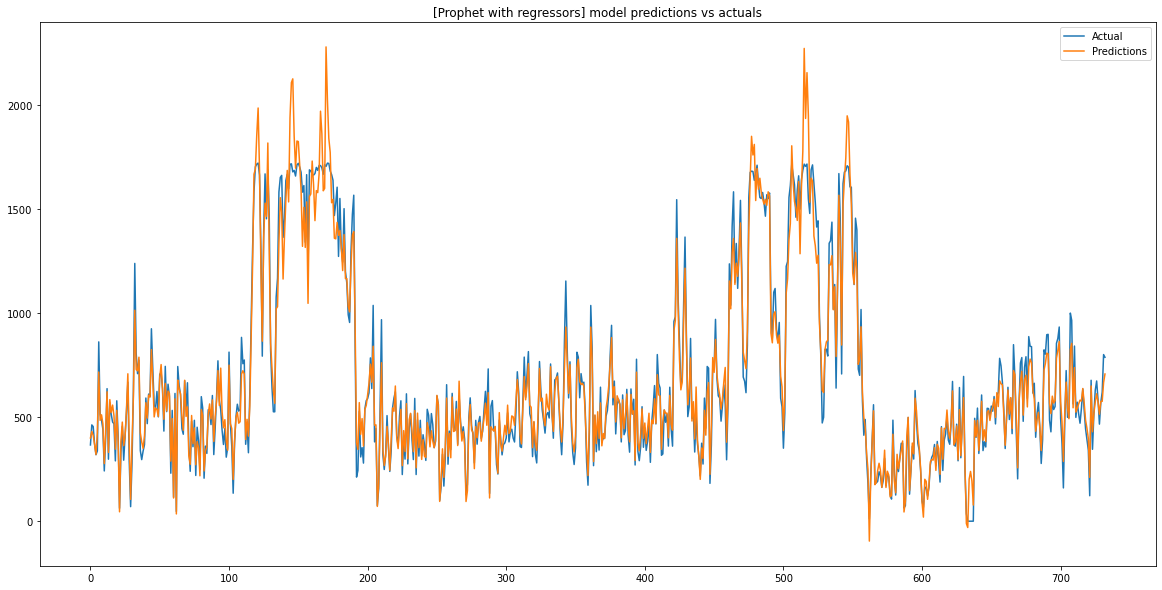

In [63]:
fig,ax1 = plt.subplots(1, 1, figsize=(20,10))
ax1.set_title('[Prophet with regressors] model predictions vs actuals')
df_train_dailylevel_noNA_2['y'].plot(ax=ax1, label='Actual')
forecast_1['yhat'].plot(ax=ax1, label='Predictions')
plt.legend()
plt.show()